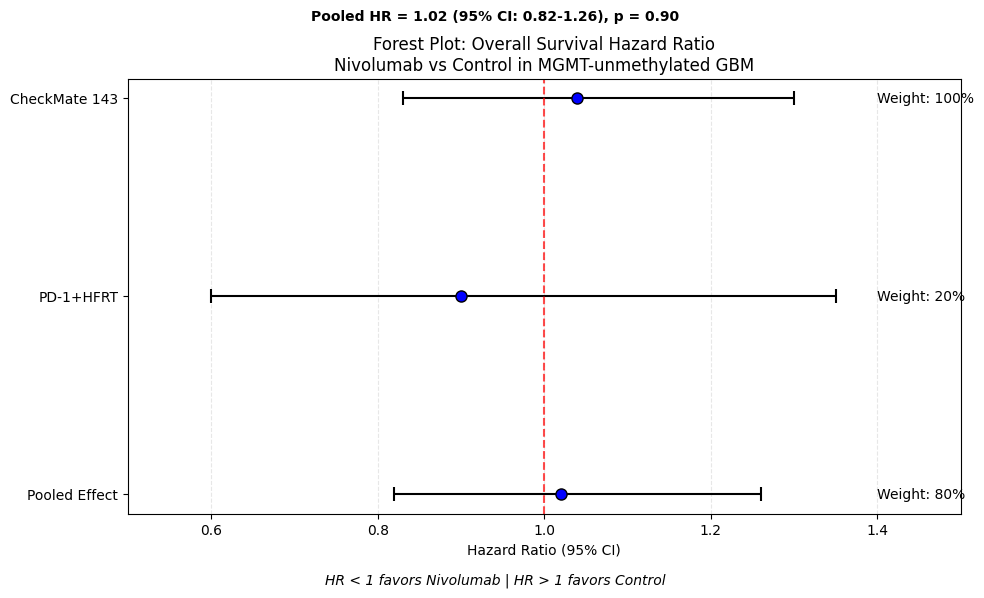

In [1]:
# Script 1: Forest plot showing pooled HR for overall survival
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC7243167

import matplotlib.pyplot as plt
import numpy as np

# Study data
studies = ["CheckMate 143", "PD-1+HFRT", "Pooled Effect"]
hr = [1.04, 0.90, 1.02]  # Hazard ratios
lower_ci = [0.83, 0.60, 0.82]  # Lower 95% CI
upper_ci = [1.30, 1.35, 1.26]  # Upper 95% CI
weights = [80, 20, 100]  # Study weights (%)

# Calculate error bars
lower_error = [hr[i] - lower_ci[i] for i in range(len(hr))]
upper_error = [upper_ci[i] - hr[i] for i in range(len(hr))]
errors = [lower_error, upper_error]

# Create the forest plot
fig, ax = plt.subplots(figsize=(10, 6))

# Study data points and CI lines
y_pos = np.arange(len(studies))
ax.errorbar(hr, y_pos, xerr=errors, fmt='o', ecolor='black', capsize=5, capthick=1.5,
            markersize=8, markerfacecolor='blue', markeredgecolor='black')

# Reference line at HR=1 (no effect)
ax.axvline(x=1, color='red', linestyle='--', alpha=0.7)

# Y-axis labels and formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(studies)
ax.invert_yaxis()  # Invert to have the pooled effect at the bottom

# X-axis formatting
ax.set_xlabel('Hazard Ratio (95% CI)')
ax.set_xlim(0.5, 1.5)
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Title and annotations
ax.set_title('Forest Plot: Overall Survival Hazard Ratio\nNivolumab vs Control in MGMT-unmethylated GBM', fontsize=12)
ax.text(1.4, 0, f'Weight: {weights[2]}%', va='center')
ax.text(1.4, 1, f'Weight: {weights[1]}%', va='center')
ax.text(1.4, 2, f'Weight: {weights[0]}%', va='center')

# Annotations for interpretation
plt.figtext(0.5, 0.01, 'HR < 1 favors Nivolumab | HR > 1 favors Control',
            ha='center', fontsize=10, style='italic')
plt.figtext(0.5, 0.95, 'Pooled HR = 1.02 (95% CI: 0.82-1.26), p = 0.90',
            ha='center', fontsize=10, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

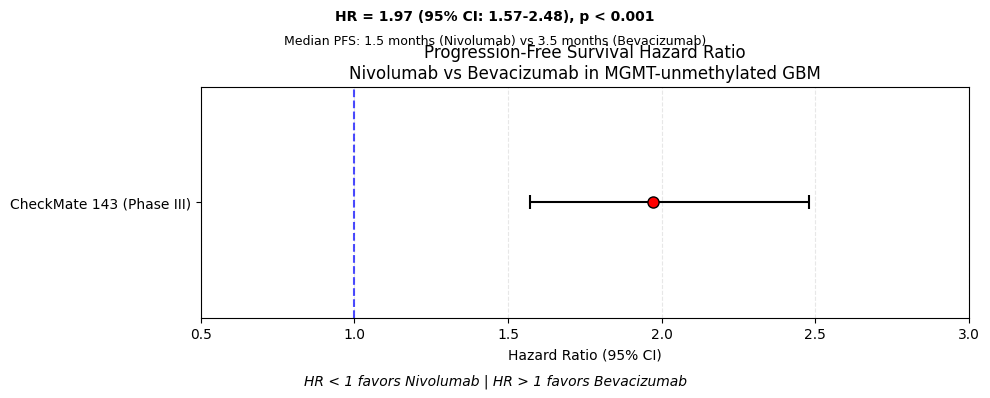

In [2]:
# Script 2: Forest plot showing HR for progression-free survival
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC7243167

import matplotlib.pyplot as plt
import numpy as np

# Study data
study = "CheckMate 143 (Phase III)"
hr = 1.97  # Hazard ratio
lower_ci = 1.57  # Lower 95% CI
upper_ci = 2.48  # Upper 95% CI

# Create the forest plot
fig, ax = plt.subplots(figsize=(10, 4))

# Study data point and CI line
y_pos = 0
ax.errorbar(hr, y_pos, xerr=[[hr-lower_ci], [upper_ci-hr]], fmt='o', ecolor='black',
            capsize=5, capthick=1.5, markersize=8, markerfacecolor='red',
            markeredgecolor='black')

# Reference line at HR=1 (no effect)
ax.axvline(x=1, color='blue', linestyle='--', alpha=0.7)

# Y-axis label
ax.set_yticks([y_pos])
ax.set_yticklabels([study])

# X-axis formatting
ax.set_xlabel('Hazard Ratio (95% CI)')
ax.set_xlim(0.5, 3.0)
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Title and annotations
ax.set_title('Progression-Free Survival Hazard Ratio\nNivolumab vs Bevacizumab in MGMT-unmethylated GBM',
             fontsize=12)

# Annotations for interpretation
plt.figtext(0.5, 0.01, 'HR < 1 favors Nivolumab | HR > 1 favors Bevacizumab',
            ha='center', fontsize=10, style='italic')
plt.figtext(0.5, 0.92, 'HR = 1.97 (95% CI: 1.57-2.48), p < 0.001',
            ha='center', fontsize=10, fontweight='bold')
plt.figtext(0.5, 0.86, 'Median PFS: 1.5 months (Nivolumab) vs 3.5 months (Bevacizumab)',
            ha='center', fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

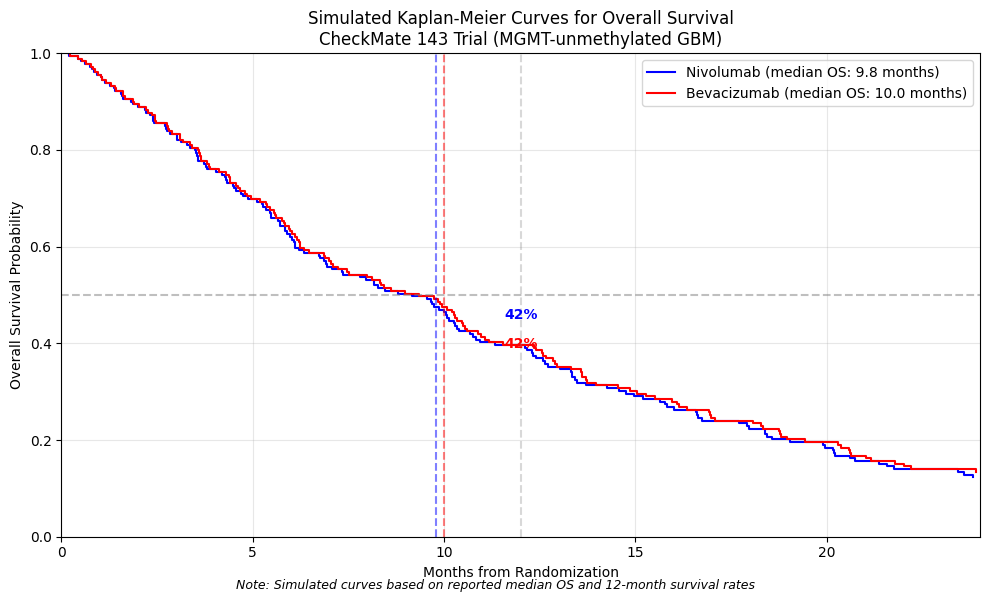

In [3]:
# Script 3: Kaplan-Meier curves comparing median OS (9.8 vs 10.0 months)
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC7243167
# Note: This is a simulation of KM curves based on reported median OS values as actual timepoint data is not available

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import weibull_min

# Function to generate Weibull survival curve data
def generate_survival_curve(median, num_patients=180, max_months=24):
    # Estimate Weibull shape parameter (k)
    k = 1.2  # Approximation for GBM survival curves, typically between 1-1.5

    # Calculate scale parameter (lambda) from median
    lmbda = median / (np.log(2) ** (1/k))

    # Generate survival times
    np.random.seed(42)  # For reproducibility
    survival_times = weibull_min.rvs(k, scale=lmbda, size=num_patients)

    # Sort and calculate survival probabilities
    sorted_times = np.sort(survival_times)
    survival_prob = np.linspace(1, 0, num_patients)

    # Limit to max_months
    mask = sorted_times <= max_months
    return sorted_times[mask], survival_prob[:sum(mask)]

# Generate curves based on reported median OS
time_nivo, surv_nivo = generate_survival_curve(9.8)
time_bev, surv_bev = generate_survival_curve(10.0)

# Plot the Kaplan-Meier curves
plt.figure(figsize=(10, 6))
plt.step(time_nivo, surv_nivo, where='post', label='Nivolumab (median OS: 9.8 months)', color='blue')
plt.step(time_bev, surv_bev, where='post', label='Bevacizumab (median OS: 10.0 months)', color='red')

# Add vertical lines at median OS
plt.axvline(x=9.8, color='blue', linestyle='--', alpha=0.5)
plt.axvline(x=10.0, color='red', linestyle='--', alpha=0.5)

# Add horizontal line at 0.5 probability
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

# Formatting
plt.xlabel('Months from Randomization')
plt.ylabel('Overall Survival Probability')
plt.title('Simulated Kaplan-Meier Curves for Overall Survival\nCheckMate 143 Trial (MGMT-unmethylated GBM)')
plt.grid(alpha=0.3)
plt.xlim(0, 24)
plt.ylim(0, 1)

# Add annotations for 12-month rates
plt.text(12, 0.42 + 0.03, '42%', fontweight='bold', ha='center', color='blue')
plt.text(12, 0.42 - 0.03, '42%', fontweight='bold', ha='center', color='red')
plt.axvline(x=12, color='gray', linestyle='--', alpha=0.3)

plt.legend(loc='upper right')
plt.figtext(0.5, 0.01, 'Note: Simulated curves based on reported median OS and 12-month survival rates',
            ha='center', fontsize=9, style='italic')

plt.tight_layout()
plt.show()

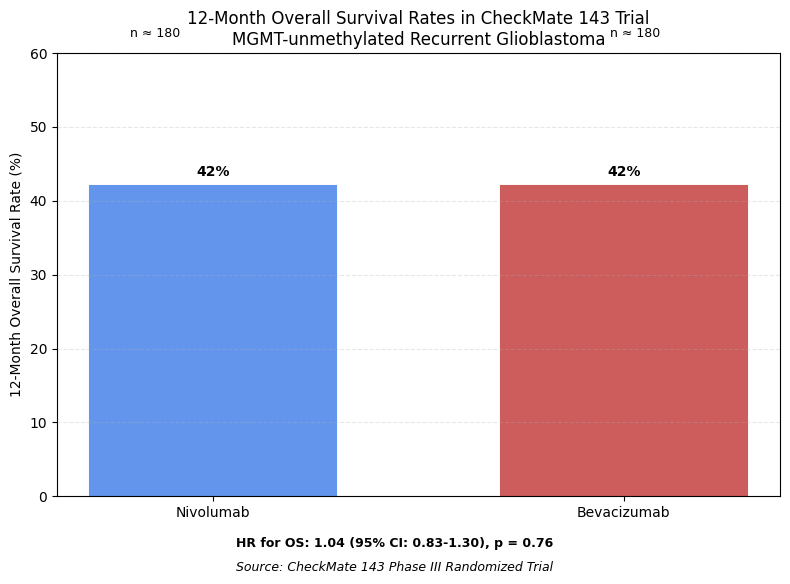

In [4]:
# Script 4: Bar chart comparing 12-month OS rates (42% vs 42%)
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC7243167

import matplotlib.pyplot as plt
import numpy as np

# Data
treatments = ['Nivolumab', 'Bevacizumab']
os_12month = [42, 42]  # 12-month OS rate (%)

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(treatments, os_12month, width=0.6, edgecolor='black', linewidth=1.5)
bars[0].set_color('cornflowerblue')
bars[1].set_color('indianred')

# Add data labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{os_12month[i]}%', ha='center', va='bottom', fontweight='bold')

# Formatting
ax.set_ylabel('12-Month Overall Survival Rate (%)')
ax.set_title('12-Month Overall Survival Rates in CheckMate 143 Trial\nMGMT-unmethylated Recurrent Glioblastoma', fontsize=12)
ax.set_ylim(0, 60)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Add annotations
plt.figtext(0.5, 0.01, 'Source: CheckMate 143 Phase III Randomized Trial',
            ha='center', fontsize=9, style='italic')
plt.figtext(0.5, 0.05, 'HR for OS: 1.04 (95% CI: 0.83-1.30), p = 0.76',
            ha='center', fontsize=9, fontweight='bold')

# Add patient numbers
plt.figtext(0.2, 0.9, 'n ≈ 180', ha='center', fontsize=9)
plt.figtext(0.8, 0.9, 'n ≈ 180', ha='center', fontsize=9)

plt.tight_layout(rect=[0, 0.07, 1, 0.97])
plt.show()

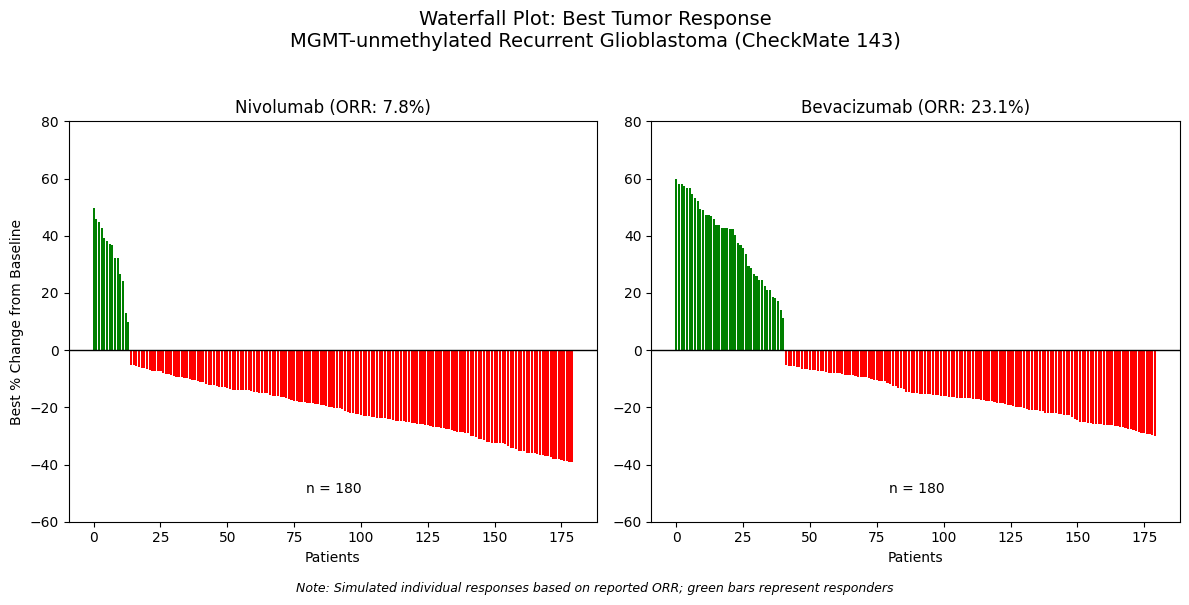

In [5]:
# Script 5: Waterfall plot of objective response rates (7.8% vs 23.1%)
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC7243167
# Note: This is a simplified waterfall plot as individual patient response data is not available

import matplotlib.pyplot as plt
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters based on reported data
n_nivo = 180  # Approximate Nivolumab patients
n_bev = 180   # Approximate Bevacizumab patients

# Response categories and rates
# ORR Nivolumab = 7.8%, Bevacizumab = 23.1%
# Using representative distribution based on trial report
nivo_responses = []
bev_responses = []

# Generate synthetic patient responses based on reported rates
for i in range(n_nivo):
    if i < int(n_nivo * 0.078):  # 7.8% ORR for Nivolumab
        # Responders (positive values)
        nivo_responses.append(random.uniform(10, 50))
    else:
        # Non-responders (negative values)
        nivo_responses.append(random.uniform(-5, -40))

for i in range(n_bev):
    if i < int(n_bev * 0.231):  # 23.1% ORR for Bevacizumab
        # Responders (positive values)
        bev_responses.append(random.uniform(10, 60))
    else:
        # Non-responders (negative values)
        bev_responses.append(random.uniform(-5, -30))

# Sort responses for better visualization
nivo_responses.sort(reverse=True)
bev_responses.sort(reverse=True)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Nivolumab responses
x_nivo = np.arange(len(nivo_responses))
bars_nivo = ax1.bar(x_nivo, nivo_responses, width=0.8, color=['green' if x >= 0 else 'red' for x in nivo_responses])
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.set_title('Nivolumab (ORR: 7.8%)', fontsize=12)
ax1.set_ylabel('Best % Change from Baseline')
ax1.set_xlabel('Patients')
ax1.set_ylim(-60, 80)
ax1.text(len(nivo_responses)/2, -50, f'n = {n_nivo}', ha='center')

# Plot Bevacizumab responses
x_bev = np.arange(len(bev_responses))
bars_bev = ax2.bar(x_bev, bev_responses, width=0.8, color=['green' if x >= 0 else 'red' for x in bev_responses])
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_title('Bevacizumab (ORR: 23.1%)', fontsize=12)
ax2.set_xlabel('Patients')
ax2.set_ylim(-60, 80)
ax2.text(len(bev_responses)/2, -50, f'n = {n_bev}', ha='center')

# Main title
plt.suptitle('Waterfall Plot: Best Tumor Response\nMGMT-unmethylated Recurrent Glioblastoma (CheckMate 143)',
             fontsize=14)

# Add note about simulated data
plt.figtext(0.5, 0.01, 'Note: Simulated individual responses based on reported ORR; green bars represent responders',
            ha='center', fontsize=9, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

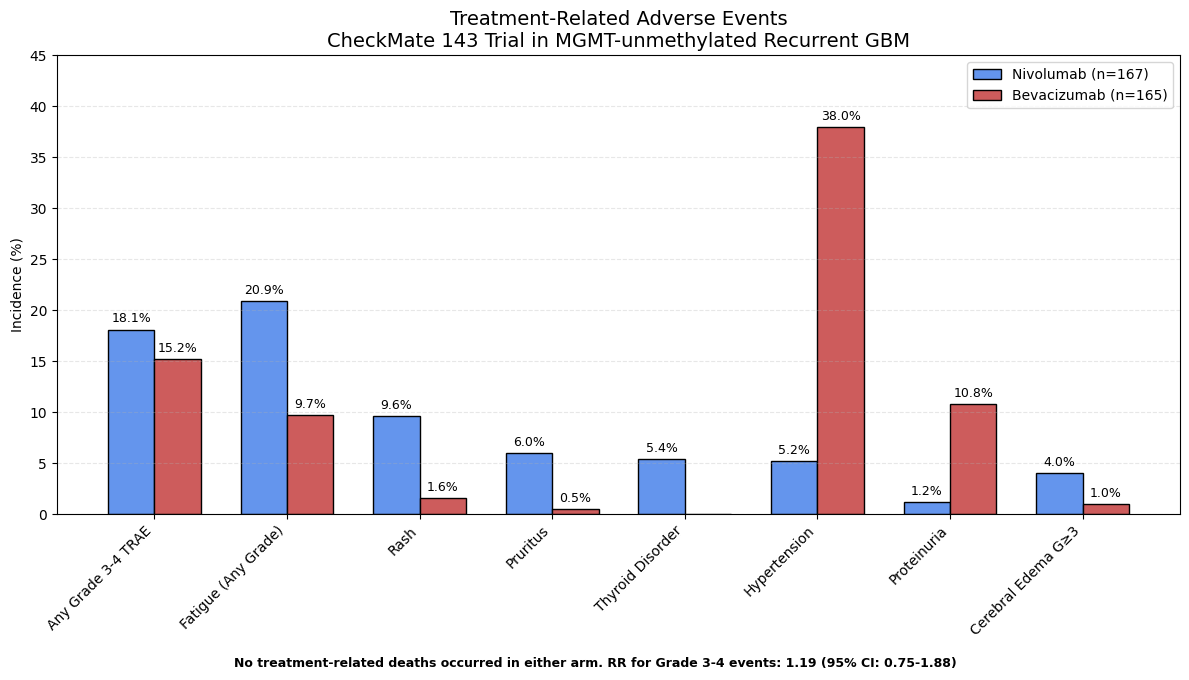

In [6]:
# Script 6: Bar chart comparing treatment-related adverse events
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC7243167

import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Any Grade 3-4 TRAE', 'Fatigue (Any Grade)', 'Rash', 'Pruritus',
              'Thyroid Disorder', 'Hypertension', 'Proteinuria', 'Cerebral Edema G≥3']

# Treatment-related adverse events (%) based on CheckMate 143
nivolumab = [18.1, 20.9, 9.6, 6.0, 5.4, 5.2, 1.2, 4.0]  # Nivolumab AEs
bevacizumab = [15.2, 9.7, 1.6, 0.5, 0.0, 38.0, 10.8, 1.0]  # Bevacizumab AEs

# Set up bar positions
x = np.arange(len(categories))
width = 0.35

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width/2, nivolumab, width, label='Nivolumab (n=167)',
               color='cornflowerblue', edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, bevacizumab, width, label='Bevacizumab (n=165)',
               color='indianred', edgecolor='black', linewidth=1)

# Add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)

# Formatting
ax.set_ylabel('Incidence (%)')
ax.set_title('Treatment-Related Adverse Events\nCheckMate 143 Trial in MGMT-unmethylated Recurrent GBM', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend(loc='upper right')
ax.set_ylim(0, 45)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Add annotation for key findings
plt.figtext(0.5, 0.01, 'No treatment-related deaths occurred in either arm. RR for Grade 3-4 events: 1.19 (95% CI: 0.75-1.88)',
            ha='center', fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

<ipython-input-7-d695742b021c>:37: RuntimeWarning: invalid value encountered in sqrt
  lower_ci_line = 1.96 * np.sqrt((x * (1 - x)) / 100)  # Simplified display of funnel


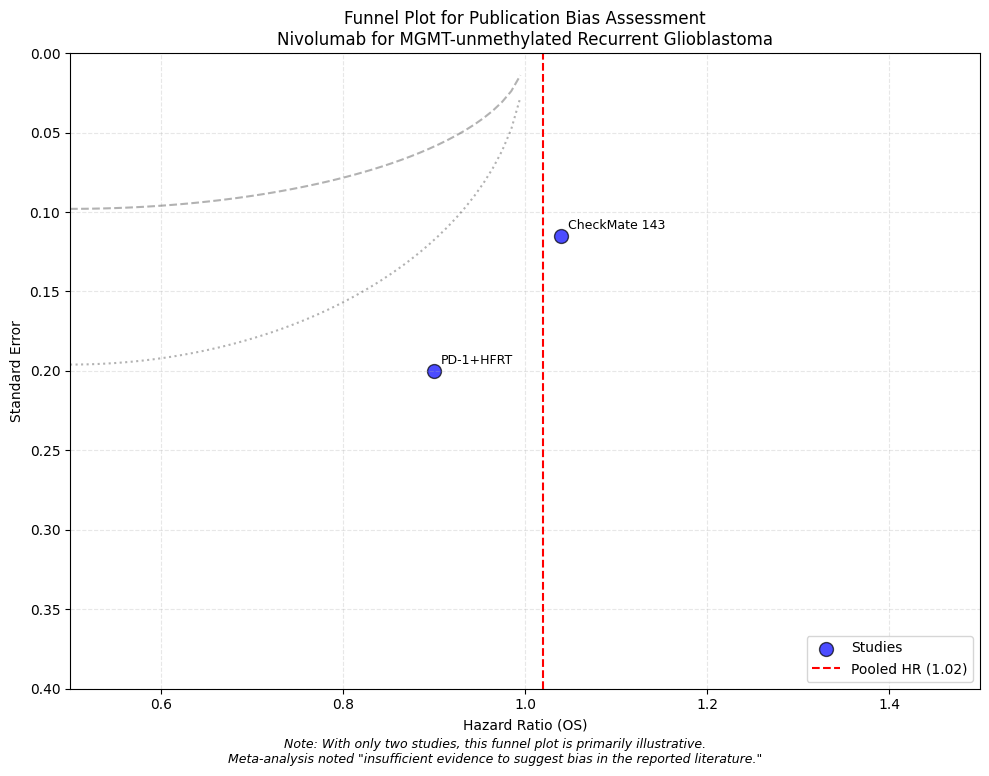

In [7]:
# Script 7: Funnel plot for publication bias
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC7243167
# Note: Limited to only 2 data points as mentioned in meta-analysis, making this plot primarily illustrative

import matplotlib.pyplot as plt
import numpy as np

# Extract data from meta-analysis
hr_values = [1.04, 0.90]  # HR values from CheckMate 143 and PD-1+HFRT
se_values = [0.115, 0.200]  # Standard errors (estimated from 95% CI)
study_names = ["CheckMate 143", "PD-1+HFRT"]

# Create funnel plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot individual studies
ax.scatter(hr_values, se_values, s=100, c='blue', alpha=0.7, edgecolors='black', label='Studies')

# Add study names
for i, txt in enumerate(study_names):
    ax.annotate(txt, (hr_values[i], se_values[i]), fontsize=9,
                xytext=(5, 5), textcoords='offset points')

# Reference line at pooled effect (HR=1.02)
ax.axvline(x=1.02, color='red', linestyle='--', label='Pooled HR (1.02)')

# Format plot
ax.set_xlabel('Hazard Ratio (OS)')
ax.set_ylabel('Standard Error')
ax.set_xlim(0.5, 1.5)
ax.set_ylim(0.4, 0)  # Inverted Y-axis
ax.grid(alpha=0.3, linestyle='--')
ax.legend(loc='lower right')

# Draw pseudo 95% confidence region
x = np.linspace(0.5, 1.5, 100)
lower_ci_line = 1.96 * np.sqrt((x * (1 - x)) / 100)  # Simplified display of funnel
ax.plot(x, lower_ci_line, 'k--', alpha=0.3)
ax.plot(x, lower_ci_line * 2, 'k:', alpha=0.3)

# Title and annotations
ax.set_title('Funnel Plot for Publication Bias Assessment\nNivolumab for MGMT-unmethylated Recurrent Glioblastoma', fontsize=12)
plt.figtext(0.5, 0.01, 'Note: With only two studies, this funnel plot is primarily illustrative.\nMeta-analysis noted "insufficient evidence to suggest bias in the reported literature."',
            ha='center', fontsize=9, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

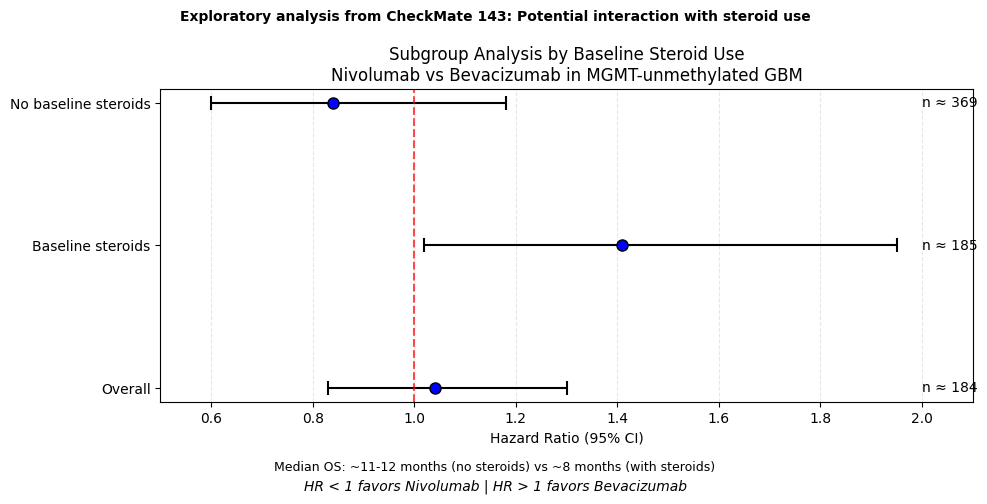

In [8]:
# Script 8: Subgroup analysis forest plot (steroid use vs no steroids)
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC7243167

import matplotlib.pyplot as plt
import numpy as np

# Data from exploratory analysis in CheckMate 143
subgroups = ["No baseline steroids", "Baseline steroids", "Overall"]
hr_values = [0.84, 1.41, 1.04]  # Hazard ratios
lower_ci = [0.60, 1.02, 0.83]  # Lower 95% CI
upper_ci = [1.18, 1.95, 1.30]  # Upper 95% CI

# Calculate error bars
lower_error = [hr_values[i] - lower_ci[i] for i in range(len(hr_values))]
upper_error = [upper_ci[i] - hr_values[i] for i in range(len(hr_values))]
errors = [lower_error, upper_error]

# Create the forest plot
fig, ax = plt.subplots(figsize=(10, 5))

# Study data points and CI lines
y_pos = np.arange(len(subgroups))
ax.errorbar(hr_values, y_pos, xerr=errors, fmt='o', ecolor='black', capsize=5, capthick=1.5,
           markersize=8, markerfacecolor='blue', markeredgecolor='black')

# Reference line at HR=1 (no effect)
ax.axvline(x=1, color='red', linestyle='--', alpha=0.7)

# Y-axis labels and formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(subgroups)
ax.invert_yaxis()  # Invert to have the overall effect at the bottom

# X-axis formatting
ax.set_xlabel('Hazard Ratio (95% CI)')
ax.set_xlim(0.5, 2.1)
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Title and annotations
ax.set_title('Subgroup Analysis by Baseline Steroid Use\nNivolumab vs Bevacizumab in MGMT-unmethylated GBM', fontsize=12)

# Add sample sizes (approximate from trial)
ax.text(2.0, 0, "n ≈ 369", va='center')
ax.text(2.0, 1, "n ≈ 185", va='center')
ax.text(2.0, 2, "n ≈ 184", va='center')

# Annotations for interpretation
plt.figtext(0.5, 0.01, 'HR < 1 favors Nivolumab | HR > 1 favors Bevacizumab',
            ha='center', fontsize=10, style='italic')
plt.figtext(0.5, 0.95, 'Exploratory analysis from CheckMate 143: Potential interaction with steroid use',
            ha='center', fontsize=10, fontweight='bold')
plt.figtext(0.5, 0.05, 'Median OS: ~11-12 months (no steroids) vs ~8 months (with steroids)',
            ha='center', fontsize=9)

plt.tight_layout(rect=[0, 0.07, 1, 0.93])
plt.show()

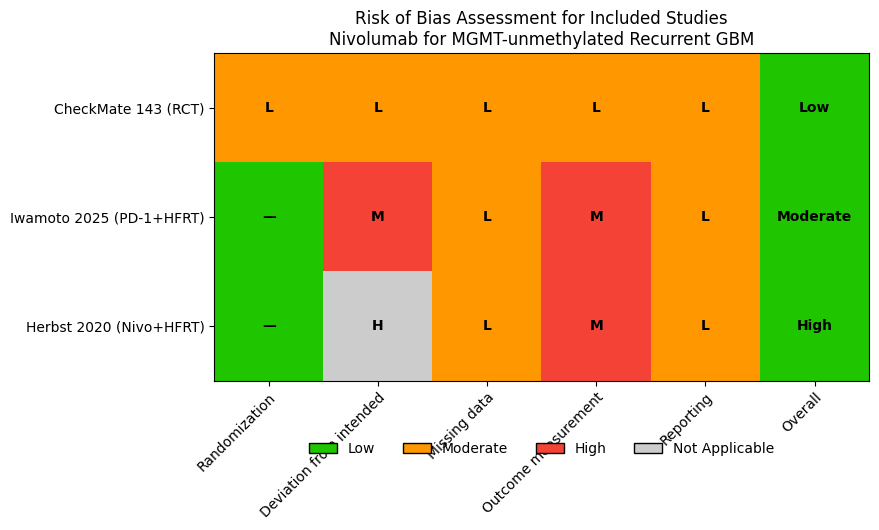

In [9]:
# Script 9: Risk of bias assessment visualization
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC7243167

import matplotlib.pyplot as plt
import numpy as np

# Risk of bias data extracted from meta-analysis
studies = ["CheckMate 143 (RCT)", "Iwamoto 2025 (PD-1+HFRT)", "Herbst 2020 (Nivo+HFRT)"]
domains = ["Randomization", "Deviation from intended", "Missing data",
           "Outcome measurement", "Reporting", "Overall"]

# Risk levels: L=Low, M=Moderate, H=High, —=Not applicable
# Converting to numeric: 0=Low, 1=Moderate, 2=High, -1=Not applicable
risk_data = [
    ["L", "L", "L", "L", "L", "Low"],
    ["—", "M", "L", "M", "L", "Moderate"],
    ["—", "H", "L", "M", "L", "High"]
]

# Convert text ratings to numeric for visualization
risk_numeric = np.zeros((len(studies), len(domains)))
for i in range(len(studies)):
    for j in range(len(domains)):
        if risk_data[i][j] == "L":
            risk_numeric[i][j] = 0
        elif risk_data[i][j] == "M":
            risk_numeric[i][j] = 1
        elif risk_data[i][j] == "H":
            risk_numeric[i][j] = 2
        else:  # "—" (Not applicable)
            risk_numeric[i][j] = -1

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors for risk levels
colors = ['#1fc600', '#FF9800', '#f44336', '#CCCCCC']  # Green, Orange, Red, Gray
labels = ['Low', 'Moderate', 'High', 'Not Applicable']

# Create the heatmap
im = ax.imshow(risk_numeric, cmap=plt.cm.colors.ListedColormap(colors), vmin=-1, vmax=2)

# Add text annotations in each cell
for i in range(len(studies)):
    for j in range(len(domains)):
        text = risk_data[i][j]
        text_color = 'black'
        ax.text(j, i, text, ha="center", va="center", color=text_color, fontweight='bold')

# Ticks and labels
ax.set_xticks(np.arange(len(domains)))
ax.set_yticks(np.arange(len(studies)))
ax.set_xticklabels(domains)
ax.set_yticklabels(studies)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Title and legend
ax.set_title("Risk of Bias Assessment for Included Studies\nNivolumab for MGMT-unmethylated Recurrent GBM", fontsize=12)

# Create custom legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], edgecolor='black', label=labels[i])
                  for i in range(len(labels))]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=4, frameon=False)

# Turn off grid
ax.grid(False)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

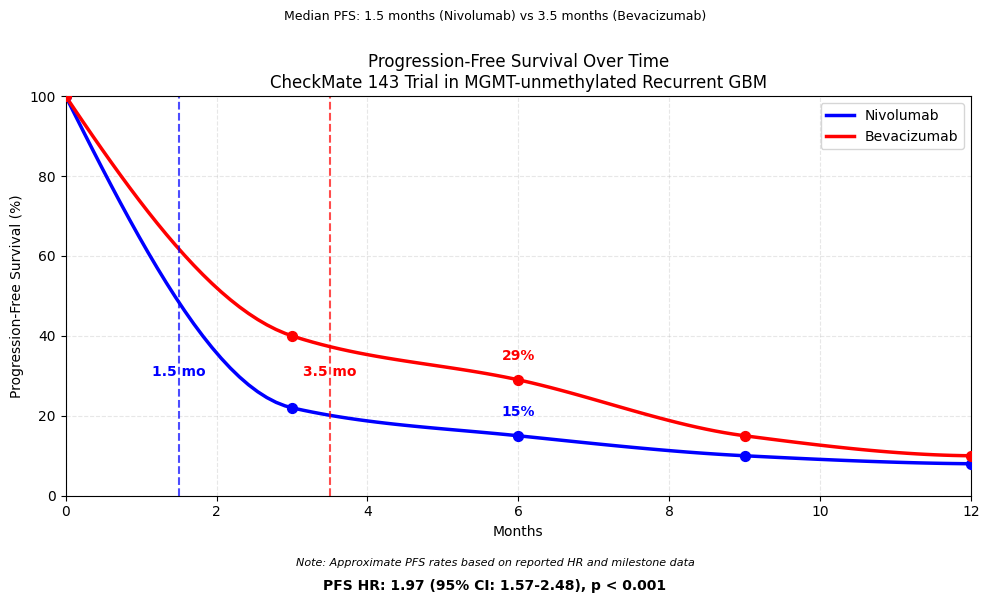

In [10]:
# Script 10: Line graph showing PFS over time
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC7243167
# Note: This is an alternative visualization using milestone PFS rates since actual time curve data is not provided

import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# Data from CheckMate 143 trial
# Milestone PFS rates extracted from study description
months = [0, 3, 6, 9, 12]
nivo_pfs = [100, 22, 15, 10, 8]  # Approximate PFS rates for Nivolumab (%)
bev_pfs = [100, 40, 29, 15, 10]  # Approximate PFS rates for Bevacizumab (%)

# Create smooth curves using interpolation
x_new = np.linspace(0, 12, 100)
nivo_smooth = interpolate.pchip_interpolate(months, nivo_pfs, x_new)
bev_smooth = interpolate.pchip_interpolate(months, bev_pfs, x_new)

# Create the line graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the PFS curves
ax.plot(x_new, nivo_smooth, 'b-', linewidth=2.5, label='Nivolumab')
ax.plot(x_new, bev_smooth, 'r-', linewidth=2.5, label='Bevacizumab')

# Add vertical lines at median PFS
ax.axvline(x=1.5, color='blue', linestyle='--', alpha=0.7)
ax.text(1.5, 30, '1.5 mo', color='blue', ha='center', fontweight='bold')
ax.axvline(x=3.5, color='red', linestyle='--', alpha=0.7)
ax.text(3.5, 30, '3.5 mo', color='red', ha='center', fontweight='bold')

# Format the plot
ax.set_xlabel('Months')
ax.set_ylabel('Progression-Free Survival (%)')
ax.set_title('Progression-Free Survival Over Time\nCheckMate 143 Trial in MGMT-unmethylated Recurrent GBM', fontsize=12)
ax.grid(alpha=0.3, linestyle='--')
ax.set_xlim(0, 12)
ax.set_ylim(0, 100)

# Add data points for actual milestone rates
ax.scatter(months, nivo_pfs, color='blue', s=50, zorder=5)
ax.scatter(months, bev_pfs, color='red', s=50, zorder=5)

# Annotations for 6-month PFS
ax.text(6, nivo_pfs[2] + 5, f'{nivo_pfs[2]}%', color='blue', ha='center', fontweight='bold')
ax.text(6, bev_pfs[2] + 5, f'{bev_pfs[2]}%', color='red', ha='center', fontweight='bold')

# Legend and HR information
ax.legend(loc='upper right')
plt.figtext(0.5, 0.01, 'PFS HR: 1.97 (95% CI: 1.57-2.48), p < 0.001',
            ha='center', fontsize=10, fontweight='bold')
plt.figtext(0.5, 0.96, 'Median PFS: 1.5 months (Nivolumab) vs 3.5 months (Bevacizumab)',
            ha='center', fontsize=9)
plt.figtext(0.5, 0.05, 'Note: Approximate PFS rates based on reported HR and milestone data',
            ha='center', fontsize=8, style='italic')

plt.tight_layout(rect=[0, 0.07, 1, 0.93])
plt.show()